In [13]:
import pandas as pd

df = pd.read_csv('Bitstamp_BTCUSD_1h.csv')



In [14]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1743206400,2025-03-29 00:00:00,BTC/USD,84384.0,84384.0,84307.0,84367.0,2.804091,2.365728e+05
1,1743202800,2025-03-28 23:00:00,BTC/USD,84419.0,84478.0,84151.0,84379.0,9.870157,8.328340e+05
2,1743199200,2025-03-28 22:00:00,BTC/USD,84000.0,84419.0,83999.0,84419.0,43.630057,3.683206e+06
3,1743195600,2025-03-28 21:00:00,BTC/USD,83756.0,84045.0,83648.0,84000.0,13.479032,1.132239e+06
4,1743192000,2025-03-28 20:00:00,BTC/USD,83719.0,84045.0,83670.0,83753.0,64.782272,5.425710e+06


In [15]:
print(df.columns.tolist())

['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']


In [16]:
df = df.sort_values(by='unix', ascending=True)
df.reset_index(drop=True, inplace=True)  # optional, to re-label the rows

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93
1,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
2,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
3,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
4,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69


In [17]:
# Price returns (close-to-close)
df['price_change_1h'] = df['close'].pct_change() * 100

df.head()

df['price_change_1h'].describe()


count    60234.000000
mean         0.006322
std          0.715398
min        -16.548398
25%         -0.239512
50%          0.007172
75%          0.255987
max         22.811775
Name: price_change_1h, dtype: float64

In [19]:
df['volume_change_1h'] = df['Volume USD'].pct_change() * 100

df.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,price_change_1h,volume_change_1h
0,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93,NaN,NaN
1,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58,-0.022766,-51.140321
2,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79,-0.120265,235.474084
3,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62,-0.231082,-80.102202
4,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69,1.005705,590.335122


In [21]:
import numpy as np


In [22]:
def garman_klass_volatility(open_: pd.Series, high: pd.Series, 
                            low: pd.Series, close: pd.Series, 
                            window: int) -> pd.Series:
    """
    Compute the Garman-Klass volatility over a rolling window.
    """
    log_hl = np.log(high / low)
    log_co = np.log(close / open_)
    
    # Garman-Klass per-bar measure
    gk = 0.5 * (log_hl ** 2) - (2*np.log(2) - 1) * (log_co ** 2)
    
    # Rolling mean of gk, then sqrt
    rolling_mean = gk.rolling(window=window).mean()
    gk_vol = np.sqrt(rolling_mean)
    
    return gk_vol

# Example usage (rolling 12 hours on 1h data):
df['garman_klass_12h'] = garman_klass_volatility(
    df['open'], df['high'], df['low'], df['close'], window=4
)


In [23]:
df.head(20)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,price_change_1h,volume_change_1h,garman_klass_12h
0,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93,NaN,NaN,NaN
1,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58,-0.022766,-51.140321,NaN
2,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79,-0.120265,235.474084,NaN
3,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62,-0.231082,-80.102202,0.005789
4,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69,1.005705,590.335122,0.007594
5,1526382000,2018-05-15 11:00:00,BTC/USD,8795.90,8821.19,8740.54,8760.00,2842987.30,324.11,-0.408145,-74.291063,0.007957
6,1526385600,2018-05-15 12:00:00,BTC/USD,8760.00,8798.60,8741.52,8760.00,2842401.44,324.20,0.000000,0.027768,0.007447
7,1526389200,2018-05-15 13:00:00,BTC/USD,8760.00,8771.02,8700.00,8759.23,6380081.87,730.67,-0.008790,125.376311,0.007721
8,1526392800,2018-05-15 14:00:00,BTC/USD,8759.23,8761.70,8467.42,8517.77,11484106.74,1341.75,-2.756635,83.632830,0.009640
9,1526396400,2018-05-15 15:00:00,BTC/USD,8517.77,8553.67,8477.89,8520.30,6747071.92,792.07,0.029703,-40.967393,0.009689


In [24]:
df.head(100).to_csv('first_100_rows.csv', index=False)

In [25]:
df['price_range_pct'] = (df['high'] - df['low']) / df['close'] * 100
df['price_range_pct'].describe()


count    60235.000000
mean         0.899332
std          0.866397
min          0.000000
25%          0.415113
50%          0.669008
75%          1.088758
max         31.219367
Name: price_range_pct, dtype: float64

In [26]:
df['oc_change_pct'] = (df['close'] - df['open']) / df['open'] * 100
df['oc_change_pct'].describe()


count    60235.000000
mean         0.006402
std          0.714606
min        -16.548398
25%         -0.239809
50%          0.006860
75%          0.256149
max         22.811775
Name: oc_change_pct, dtype: float64

In [27]:
df['hour'] = pd.to_datetime(df['date']).dt.hour
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek


In [28]:
df.head(20)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,price_change_1h,volume_change_1h,garman_klass_12h,price_range_pct,oc_change_pct,hour,day_of_week
0,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93,NaN,NaN,NaN,1.022767,0.081636,6,1
1,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58,-0.022766,-51.140321,NaN,0.513674,-0.022766,7,1
2,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79,-0.120265,235.474084,NaN,1.028127,-0.120265,8,1
3,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62,-0.231082,-80.102202,0.005789,0.609188,-0.231082,9,1
4,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69,1.005705,590.335122,0.007594,1.931468,1.005705,10,1
5,1526382000,2018-05-15 11:00:00,BTC/USD,8795.90,8821.19,8740.54,8760.00,2842987.30,324.11,-0.408145,-74.291063,0.007957,0.920662,-0.408145,11,1
6,1526385600,2018-05-15 12:00:00,BTC/USD,8760.00,8798.60,8741.52,8760.00,2842401.44,324.20,0.000000,0.027768,0.007447,0.651598,0.000000,12,1
7,1526389200,2018-05-15 13:00:00,BTC/USD,8760.00,8771.02,8700.00,8759.23,6380081.87,730.67,-0.008790,125.376311,0.007721,0.810802,-0.008790,13,1
8,1526392800,2018-05-15 14:00:00,BTC/USD,8759.23,8761.70,8467.42,8517.77,11484106.74,1341.75,-2.756635,83.632830,0.009640,3.454895,-2.756635,14,1
9,1526396400,2018-05-15 15:00:00,BTC/USD,8517.77,8553.67,8477.89,8520.30,6747071.92,792.07,0.029703,-40.967393,0.009689,0.889405,0.029703,15,1


In [29]:
import numpy as np
def parkinson_volatility(high, low, window):
    log_hl_sq = np.log(high / low) ** 2
    rolling_sum = log_hl_sq.rolling(window=window).sum()
    factor = 1 / (4 * np.log(2) * window)
    return np.sqrt(factor * rolling_sum)

df['parkinson_3h'] = parkinson_volatility(df['high'], df['low'], window=3)

df.head(20)

df['price_range_pct'].describe()




count    60235.000000
mean         0.899332
std          0.866397
min          0.000000
25%          0.415113
50%          0.669008
75%          1.088758
max         31.219367
Name: price_range_pct, dtype: float64

In [30]:
df['ma_3h'] = df['close'].rolling(window=3).mean()

df.head(20)

df['ma_3h'].describe()




count     60233.000000
mean      31305.108718
std       24940.793510
min        3143.803333
25%        9275.273333
50%       26017.000000
75%       46822.250000
max      108002.333333
Name: ma_3h, dtype: float64

In [31]:
df['rolling_std_3h'] = df['close'].rolling(window=3).std()

df.head(20)

df['rolling_std_3h'].describe()




count    60233.000000
mean       119.221093
std        174.831459
min          0.000000
25%         19.467922
50%         55.375009
75%        147.943104
max       3356.193727
Name: rolling_std_3h, dtype: float64

In [33]:
df['lag_1_price_return'] = df['price_change_1h'].shift(1)
df['lag_2_price_return'] = df['price_change_1h'].shift(2)
df['lag_1_volume_return'] = df['volume_change_1h'].shift(1)


In [34]:
df.head(500).to_csv('first_500_rows.csv', index=False)

In [36]:
df['target_price_change'] = df['price_change_1h'].shift(-1)

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [38]:
df = df.dropna()  # Remove last row with NaN target

In [39]:
df = df.drop(columns=['unix', 'date', 'symbol', 'oc_change_pct'])


In [40]:
df.head(10)

,open,high,low,close,Volume BTC,Volume USD,price_change_1h,volume_change_1h,garman_klass_12h,price_range_pct,hour,day_of_week,parkinson_3h,ma_3h,rolling_std_3h,lag_1_price_return,lag_2_price_return,lag_1_volume_return,target_price_change
3,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62,-0.231082,-80.102202,0.005789,0.609188,9,1,0.004515,8725.270000,15.591405,-0.120265,-0.022766,235.474084,1.005705
4,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69,1.005705,590.335122,0.007594,1.931468,10,1,0.007889,8744.236667,45.864281,-0.231082,-0.120265,-80.102202,-0.408145
5,8795.90,8821.19,8740.54,8760.00,2842987.30,324.11,-0.408145,-74.291063,0.007957,0.920662,11,1,0.007720,8754.740000,44.026297,1.005705,-0.231082,590.335122,0.000000
6,8760.00,8798.60,8741.52,8760.00,2842401.44,324.20,0.000000,0.027768,0.007447,0.651598,12,1,0.007762,8771.966667,20.726875,-0.408145,1.005705,-74.291063,-0.008790
7,8760.00,8771.02,8700.00,8759.23,6380081.87,730.67,-0.008790,125.376311,0.007721,0.810802,13,1,0.004815,8759.743333,0.444560,0.000000,-0.408145,0.027768,-2.756635
8,8759.23,8761.70,8467.42,8517.77,11484106.74,1341.75,-2.756635,83.632830,0.009640,3.454895,14,1,0.012384,8679.000000,139.629807,-0.008790,0.000000,125.376311,0.029703
9,8517.77,8553.67,8477.89,8520.30,6747071.92,792.07,0.029703,-40.967393,0.009689,0.889405,15,1,0.012562,8599.100000,138.682417,-2.756635,-0.008790,83.632830,0.175229
10,8520.30,8589.10,8500.78,8535.23,3298228.22,385.69,0.175229,-51.306071,0.010082,1.034770,16,1,0.012755,8524.433333,9.435371,0.029703,-2.756635,-40.967393,0.130166
11,8535.23,8579.48,8500.00,8546.34,4058869.11,475.08,0.130166,23.176644,0.010200,0.929989,17,1,0.005725,8533.956667,13.066615,0.175229,0.029703,-51.306071,-0.230391
12,8546.34,8555.51,8400.00,8526.65,7443239.63,877.26,-0.230391,84.655216,0.008670,1.823811,18,1,0.007982,8536.073333,9.872053,0.130166,0.175229,23.176644,0.339524


In [42]:
# Check for inf and nan values
print(f"Number of inf values: {df.isin([float('inf'), -float('inf')]).sum().sum()}")
print(f"Number of NaN values: {df.isna().sum().sum()}")

# Drop rows with inf or NaN values
df = df.replace([float('inf'), -float('inf')], np.nan)
df = df.dropna()

print(f"Shape after dropping inf/NaN values: {df.shape}")


Number of inf values: 10
Number of NaN values: 0
Shape after dropping inf/NaN values: (60215, 19)


Mean Squared Error on the test set: 0.5276790046330334


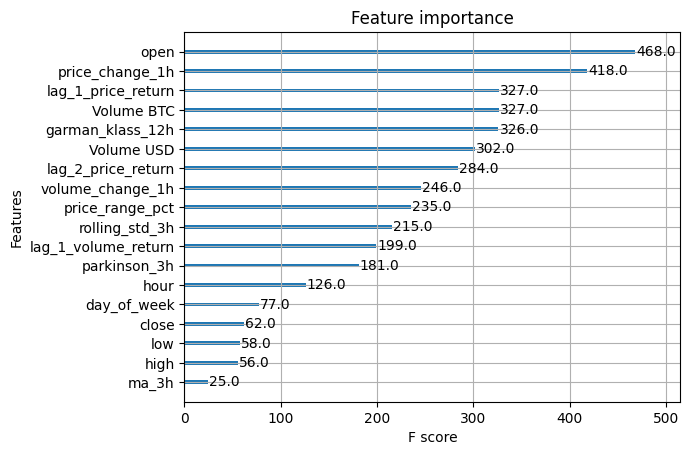

In [43]:
# Define features (X) and target (y)
X = df.drop('target_price_change', axis=1)
y = df['target_price_change']

# Split the data into training and testing sets
# Use a portion for testing, e.g., 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth etc.
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on the test set: {mse}")

# Optionally, you can view feature importances
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [44]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

tscv = TimeSeriesSplit(n_splits=5)
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid = GridSearchCV(model_xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X, y)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)


KeyboardInterrupt: 

In [45]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split # We will use this for convenience but split sequentially
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Drop the price_change_1h column from the DataFrame
if 'price_change_1h' in df.columns:
    df = df.drop('price_change_1h', axis=1)
    print("Dropped 'price_change_1h' column from the DataFrame")
else:
    print("Column 'price_change_1h' not found in the DataFrame")

# Display the updated DataFrame columns to confirm the column was dropped
print("\nUpdated DataFrame columns:")
print(df.columns.tolist())


Dropped 'price_change_1h' column from the DataFrame

Updated DataFrame columns:
['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour', 'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h', 'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return', 'target_price_change']


In [52]:
# Create a binary target column based on target_price_change
# 1 if target_price_change is >= 0 (price went up or stayed the same)
# 0 if target_price_change is < 0 (price went down)
df['target'] = (df['target_price_change'] >= 0).astype(int)

# Display the distribution of the new target column
print("\nTarget distribution:")
print(df['target'].value_counts())
print(f"Percentage of positive cases: {df['target'].mean() * 100:.2f}%")

# Verify the first few rows to confirm the transformation is correct
print("\nSample data with new target column:")
sample_df = df[['target_price_change', 'target']].head(10)
print(sample_df)



Target distribution:
target
1    30695
0    29520
Name: count, dtype: int64
Percentage of positive cases: 50.98%

Sample data with new target column:
    target_price_change  target
3              1.005705       1
4             -0.408145       0
5              0.000000       1
6             -0.008790       0
7             -2.756635       0
8              0.029703       1
9              0.175229       1
10             0.130166       1
11            -0.230391       0
12             0.339524       1


In [53]:
features = df.drop(['target_price_change', 'target'], axis=1)  # Specify axis=1 for columns
target = df['target']

In [54]:
# --- 5. Data Splitting (Sequential) ---
# Split data sequentially for time series validation
test_size_ratio = 0.2 # Use last 20% of data for testing
split_index = int(len(df) * (1 - test_size_ratio))

X_train = features[:split_index]
X_test = features[split_index:]
y_train = target[:split_index]
y_test = target[split_index:]

print(f"\nData split sequentially:")
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test.shape}, y={y_test.shape}")
print(f"Training data covers time up to index {split_index-1}")
print(f"Testing data starts from index {split_index}")


Data split sequentially:
Training set shape: X=(48172, 17), y=(48172,)
Testing set shape: X=(12043, 17), y=(12043,)
Training data covers time up to index 48171
Testing data starts from index 48172


In [55]:
# --- 6. Model Training ---
print("\nTraining XGBoost Classifier...")
# Define the model - use_label_encoder=False is recommended
# Consider adding scale_pos_weight if classes are imbalanced
# scale_pos_weight = sum(y_train == 0) / sum(y_train == 1) # Example calculation
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss', # 'auc' is also common
    use_label_encoder=False,
    random_state=42,
    # n_estimators=100,  # Default is 100, can be tuned
    # learning_rate=0.1, # Default is 0.3, smaller often better with more estimators
    # max_depth=3,       # Default is 6, smaller can prevent overfitting
    # scale_pos_weight=scale_pos_weight # Uncomment if needed for imbalance
)

model.fit(X_train, y_train)
print("Training complete.")


Training XGBoost Classifier...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Training complete.


In [56]:
# --- 7. Prediction ---
print("\nMaking predictions on the test set...")
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of class 1 (price increase > 0)
y_pred_class = model.predict(X_test)             # Class prediction (0 or 1)

# Create a DataFrame for easy viewing of results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Class': y_pred_class,
    'Confidence_Score (Prob>0)': y_pred_proba
})
print("\nSample predictions with confidence scores:")
print(results_df.head())
print(results_df.tail())


Making predictions on the test set...

Sample predictions with confidence scores:
       Actual  Predicted_Class  Confidence_Score (Prob>0)
48186       1                1                   0.610572
48187       0                0                   0.430150
48188       0                0                   0.483986
48189       1                1                   0.643058
48190       0                1                   0.611757
       Actual  Predicted_Class  Confidence_Score (Prob>0)
60229       1                0                   0.356391
60230       1                1                   0.722060
60231       1                0                   0.156436
60232       0                0                   0.230609
60233       0                0                   0.241870



Evaluating model performance...
Accuracy: 0.5035
ROC AUC Score: 0.5111

Confusion Matrix:


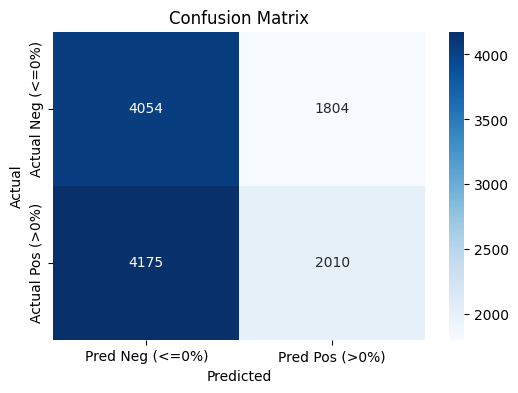


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.69      0.58      5858
           1       0.53      0.32      0.40      6185

    accuracy                           0.50     12043
   macro avg       0.51      0.51      0.49     12043
weighted avg       0.51      0.50      0.49     12043



In [57]:
# --- 8. Evaluation ---
print("\nEvaluating model performance...")

accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
# Use seaborn for a prettier confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Neg (<=0%)', 'Pred Pos (>0%)'],
            yticklabels=['Actual Neg (<=0%)', 'Actual Pos (>0%)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(class_report)

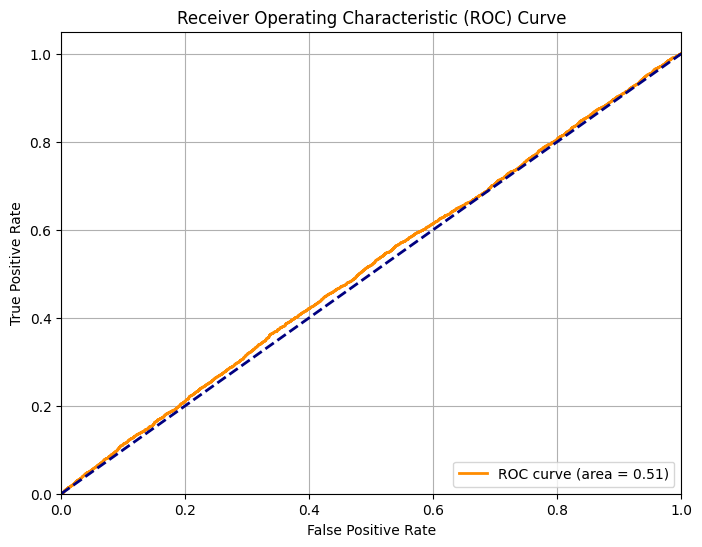

In [58]:
# --- ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Feature Importances:
ma_3h                  0.080186
low                    0.067696
high                   0.064662
close                  0.061844
rolling_std_3h         0.060652
lag_1_price_return     0.060451
Volume BTC             0.058779
lag_1_volume_return    0.058628
parkinson_3h           0.057810
price_range_pct        0.056486
garman_klass_12h       0.055541
Volume USD             0.055313
volume_change_1h       0.055050
lag_2_price_return     0.054326
open                   0.054236
day_of_week            0.051284
hour                   0.047058
dtype: float32


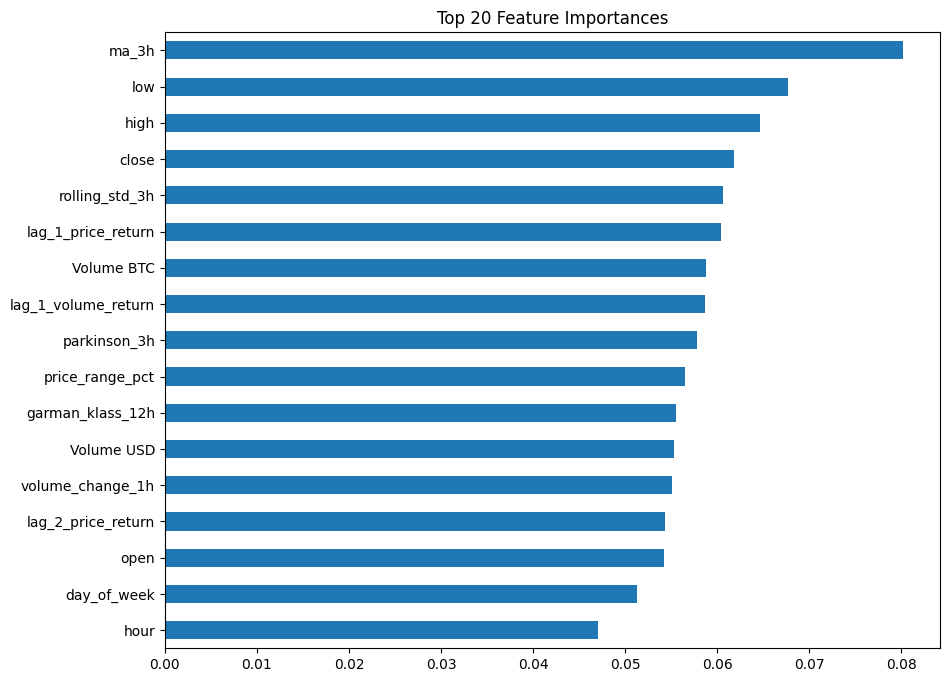

In [59]:
# --- Feature Importance ---
print("\nFeature Importances:")
importances = pd.Series(model.feature_importances_, index=features.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(20)) # Print top 20 features

plt.figure(figsize=(10, 8))
importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis() # Display feature with highest importance at the top
plt.show()

In [60]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit # Import TimeSeriesSplit
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    # We won't plot curves for each fold, focus on AUC scores
)

In [61]:
df.shape

(60215, 19)

In [62]:
df.columns

Index(['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD',
       'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour',
       'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h',
       'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return',
       'target_price_change', 'target'],
      dtype='object')

In [63]:
features = df.drop(['target_price_change', 'target'], axis=1)  # Specify axis=1 for columns
target = df['target']

In [64]:
# --- 5. Time Series Cross-Validation Setup ---
n_splits = 5       # How many splits/folds to create
# test_size = 2000   # Number of samples in each test set (as you suggested)
test_size = int(len(features) * 0.05) # Alternative: use a percentage

In [65]:
# Ensure test_size is feasible
if test_size * n_splits >= len(features):
     print(f"Warning: test_size ({test_size}) * n_splits ({n_splits}) is too large for the dataset size ({len(features)}).")
     # Adjust n_splits or test_size if needed
     test_size = len(features) // (n_splits + 2) # Example adjustment
     print(f"Adjusting test_size to {test_size}")
     if test_size < 10: # Need a minimum size
          print("Error: Cannot create meaningful splits with current settings and data size.")
          exit()


tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
print(f"\nInitialized TimeSeriesSplit with n_splits={n_splits}, test_size={test_size}")


Initialized TimeSeriesSplit with n_splits=5, test_size=3010


In [66]:
# Lists to store scores from each fold
accuracy_scores = []
roc_auc_scores = []
fold_predictions = [] # To potentially analyze predictions across folds

In [68]:
target_series = df['target']

In [69]:
# --- 6. Rolling Training and Evaluation Loop ---
print("\nStarting Rolling Time Series Cross-Validation...")

for fold, (train_index, test_index) in enumerate(tscv.split(features)):
    print(f"\n--- Fold {fold + 1}/{n_splits} ---")
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target_series.iloc[train_index], target_series.iloc[test_index]

    print(f"Train indices: {train_index[0]} to {train_index[-1]} (Size: {len(train_index)})")
    print(f"Test indices: {test_index[0]} to {test_index[-1]} (Size: {len(test_index)})")
    print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
    print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

    # Initialize a *new* model for each fold
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42 + fold # Vary random state slightly per fold if desired
        # Add other hyperparameters here if tuning
    )

    # Train the model
    print("Training model for this fold...")
    model.fit(X_train, y_train)

    # --- 7. Prediction (for this fold) ---
    print("Predicting on test set for this fold...")
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_class = model.predict(X_test)

    # --- 8. Evaluation (for this fold) ---
    accuracy = accuracy_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)

    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")
    print(f"Fold {fold + 1} ROC AUC: {roc_auc:.4f}")

    # Optional: Store predictions if you want to analyze them later
    fold_df = pd.DataFrame({'Actual': y_test, 'Predicted_Class': y_pred_class, 'Confidence': y_pred_proba, 'Fold': fold + 1})
    fold_predictions.append(fold_df)


Starting Rolling Time Series Cross-Validation...

--- Fold 1/5 ---
Train indices: 0 to 45164 (Size: 45165)
Test indices: 45165 to 48174 (Size: 3010)
y_train distribution:
target
1    0.50807
0    0.49193
Name: proportion, dtype: float64
y_test distribution:
target
1    0.519601
0    0.480399
Name: proportion, dtype: float64
Training model for this fold...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Predicting on test set for this fold...
Fold 1 Accuracy: 0.5066
Fold 1 ROC AUC: 0.5124

--- Fold 2/5 ---
Train indices: 0 to 48174 (Size: 48175)
Test indices: 48175 to 51184 (Size: 3010)
y_train distribution:
target
1    0.508791
0    0.491209
Name: proportion, dtype: float64
y_test distribution:
target
1    0.517276
0    0.482724
Name: proportion, dtype: float64
Training model for this fold...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Predicting on test set for this fold...
Fold 2 Accuracy: 0.4997
Fold 2 ROC AUC: 0.5033

--- Fold 3/5 ---
Train indices: 0 to 51184 (Size: 51185)
Test indices: 51185 to 54194 (Size: 3010)
y_train distribution:
target
1    0.50929
0    0.49071
Name: proportion, dtype: float64
y_test distribution:
target
1    0.509967
0    0.490033
Name: proportion, dtype: float64
Training model for this fold...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Predicting on test set for this fold...
Fold 3 Accuracy: 0.4970
Fold 3 ROC AUC: 0.5014

--- Fold 4/5 ---
Train indices: 0 to 54194 (Size: 54195)
Test indices: 54195 to 57204 (Size: 3010)
y_train distribution:
target
1    0.509327
0    0.490673
Name: proportion, dtype: float64
y_test distribution:
target
1    0.51196
0    0.48804
Name: proportion, dtype: float64
Training model for this fold...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Predicting on test set for this fold...
Fold 4 Accuracy: 0.4950
Fold 4 ROC AUC: 0.4986

--- Fold 5/5 ---
Train indices: 0 to 57204 (Size: 57205)
Test indices: 57205 to 60214 (Size: 3010)
y_train distribution:
target
1    0.509466
0    0.490534
Name: proportion, dtype: float64
y_test distribution:
target
1    0.515282
0    0.484718
Name: proportion, dtype: float64
Training model for this fold...


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Predicting on test set for this fold...
Fold 5 Accuracy: 0.5033
Fold 5 ROC AUC: 0.5039


In [70]:
# --- 9. Aggregate Results ---
print("\n--- Cross-Validation Summary ---")
print(f"ROC AUC Scores per fold: {[round(s, 4) for s in roc_auc_scores]}")
print(f"Mean ROC AUC: {np.mean(roc_auc_scores):.4f}")
print(f"Std Dev ROC AUC: {np.std(roc_auc_scores):.4f}")
print("-" * 30)
print(f"Accuracy Scores per fold: {[round(s, 4) for s in accuracy_scores]}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Std Dev Accuracy: {np.std(accuracy_scores):.4f}")


--- Cross-Validation Summary ---
ROC AUC Scores per fold: [0.5124, 0.5033, 0.5014, 0.4986, 0.5039]
Mean ROC AUC: 0.5039
Std Dev ROC AUC: 0.0046
------------------------------
Accuracy Scores per fold: [0.5066, 0.4997, 0.497, 0.495, 0.5033]
Mean Accuracy: 0.5003
Std Dev Accuracy: 0.0042


In [71]:
# --- !! NEW: Create a final hold-out set BEFORE grid search !! ---
# Hold out the last portion of data for final testing *after* tuning
final_test_size_ratio = 0.15 # e.g., last 15% for final validation
final_split_index = int(len(features) * (1 - final_test_size_ratio))

X_train_val = features[:final_split_index]
X_final_test = features[final_split_index:]
y_train_val = target_series[:final_split_index]
y_final_test = target_series[final_split_index:]

print(f"\nData split for GridSearch + Final Test:")
print(f"Training/Validation set shape: X={X_train_val.shape}, y={y_train_val.shape}")
print(f"Final Hold-out Test set shape: X={X_final_test.shape}, y={y_final_test.shape}")


Data split for GridSearch + Final Test:
Training/Validation set shape: X=(51182, 17), y=(51182,)
Final Hold-out Test set shape: X=(9033, 17), y=(9033,)


In [72]:
# --- Define Parameter Grid ---
# START SMALL! This can take a long time.
param_grid = {
    'n_estimators': [50, 100], # Number of boosting rounds
    'max_depth': [3, 5],        # Max depth of a tree
    'learning_rate': [0.1, 0.05], # Step size shrinkage
    'subsample': [0.7, 0.9],      # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.9] # Fraction of features used per tree
    # Add other parameters like 'gamma', 'reg_alpha', 'reg_lambda' if needed
}

In [83]:
# Example of a slightly larger grid (will take much longer):
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1]
}

In [84]:
# --- Setup TimeSeriesSplit for GridSearchCV ---
# Use fewer splits for grid search initially to save time
n_splits_cv = 6 # Or 4, 5 - depends on time constraints
# Ensure test_size is appropriate for X_train_val length
max_test_size = len(X_train_val) // (n_splits_cv + 1)
cv_test_size = min(2000, max_test_size) # Use previous test size or adapt
if cv_test_size < 50:
    print(f"Warning: CV test size ({cv_test_size}) is very small. Consider fewer splits or more data.")
    # Potentially exit or adjust further

tscv_grid = TimeSeriesSplit(n_splits=n_splits_cv, test_size=cv_test_size)
print(f"\nUsing TimeSeriesSplit for GridSearchCV with n_splits={n_splits_cv}, test_size={cv_test_size}")


Using TimeSeriesSplit for GridSearchCV with n_splits=6, test_size=2000


In [85]:
from sklearn.metrics import (
    roc_auc_score,
    make_scorer, # <-- ADD THIS
    accuracy_score # Keep if you calculate final accuracy later
    # Add classification_report, confusion_matrix if needed later
)

In [86]:
# --- Initialize Base Model ---
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss', # Won't be used by GridSearchCV scoring, but good practice
    use_label_encoder=False,
    random_state=42
)

# --- Setup GridSearchCV ---
# Define scorer
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=roc_auc_scorer, # Use ROC AUC to select the best model
    cv=tscv_grid,          # CRITICAL: Use TimeSeriesSplit here
    n_jobs=-1,             # Use all available CPU cores
    verbose=2              # Show progress (higher value = more messages)
)

C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [87]:
# --- Run GridSearchCV ---
print("\nStarting GridSearchCV... This may take a significant amount of time.")
# Fit using the training/validation portion of the data
grid_search.fit(X_train_val, y_train_val)
print("GridSearchCV complete.")


Starting GridSearchCV... This may take a significant amount of time.
Fitting 6 folds for each of 486 candidates, totalling 2916 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [82]:
# --- Display Best Results ---
print("\n--- GridSearchCV Best Results ---")
print(f"Best ROC AUC Score (on validation folds): {grid_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(grid_search.best_params_)

# The best model found, automatically refit on the whole X_train_val, y_train_val
best_model = grid_search.best_estimator_

# --- Evaluate Best Model on Final Hold-Out Set ---
print("\n--- Evaluating Best Model on Final Hold-Out Test Set ---")
y_final_pred_proba = best_model.predict_proba(X_final_test)[:, 1]
y_final_pred_class = best_model.predict(X_final_test)

final_accuracy = accuracy_score(y_final_test, y_final_pred_class)
final_roc_auc = roc_auc_score(y_final_test, y_final_pred_proba)

print(f"Final Test Set Accuracy: {final_accuracy:.4f}")
print(f"Final Test Set ROC AUC: {final_roc_auc:.4f}") # This is the most important score now

# You can also print the classification report for the final test set
# from sklearn.metrics import classification_report
# print("\nFinal Test Set Classification Report:")
# print(classification_report(y_final_test, y_final_pred_class))


--- GridSearchCV Best Results ---
Best ROC AUC Score (on validation folds): 0.5323
Best Hyperparameters:
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.9}

--- Evaluating Best Model on Final Hold-Out Test Set ---
Final Test Set Accuracy: 0.5101
Final Test Set ROC AUC: 0.5166


In [88]:
print("Original columns:", df.columns.tolist())
print("DataFrame shape before adding features:", df.shape)

Original columns: ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour', 'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h', 'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return', 'target_price_change', 'target']
DataFrame shape before adding features: (60215, 19)


In [89]:
# --- 1. Longer Lookback Periods ---

# a) Lagged Returns (using 'close' price)
# Calculate 1-hour pct change if not already done accurately
# Note: Your existing lag_N_price_return might be different, double-check its calculation.
# Here we calculate the simple 1-hour return ending at the current row.
df['price_return_1h'] = df['close'].pct_change() * 100 # Calculate % return

lag_periods_price = [3, 6, 12, 24, 48, 72, 168] # Hours (168h = 1 week)
for lag in lag_periods_price:
    # This creates the return from 'lag' hours ago up to 'lag-1' hours ago
    df[f'lag_{lag}h_price_return'] = df['price_return_1h'].shift(lag -1) # Shift the 1h return

# b) Lagged Volume Changes (Using Volume BTC for example)
# Calculate 1-hour pct change in volume
df['volume_return_1h'] = df['Volume BTC'].pct_change() * 100

lag_periods_volume = [3, 6, 12, 24]
for lag in lag_periods_volume:
     df[f'lag_{lag}h_volume_return'] = df['volume_return_1h'].shift(lag - 1)

# c) Longer Moving Averages (MA)
ma_periods = [6, 12, 24, 48, 72, 168] # Hours
for p in ma_periods:
    df[f'ma_{p}h'] = df['close'].rolling(window=p).mean()

# d) Longer Rolling Standard Deviation (Volatility of Returns)
std_periods = [6, 12, 24, 48, 72, 168] # Hours
for p in std_periods:
    # Use the 1-hour return we calculated earlier
    df[f'rolling_std_{p}h'] = df['price_return_1h'].rolling(window=p).std()

In [90]:
# --- 2. More Sophisticated Volatility Measures ---

# a) Average True Range (ATR)
# Calculate True Range (TR)
df['prev_close'] = df['close'].shift(1)
df['high_minus_low'] = df['high'] - df['low']
df['high_minus_prev_close'] = np.abs(df['high'] - df['prev_close'])
df['low_minus_prev_close'] = np.abs(df['low'] - df['prev_close'])
df['true_range'] = df[['high_minus_low', 'high_minus_prev_close', 'low_minus_prev_close']].max(axis=1)

# Calculate ATR (using simple moving average for simplicity here)
atr_periods = [14, 24, 48] # Common periods (often days, but using hours here)
for p in atr_periods:
     df[f'atr_{p}h'] = df['true_range'].rolling(window=p).mean()

# Clean up intermediate TR columns
df = df.drop(columns=['prev_close', 'high_minus_low', 'high_minus_prev_close', 'low_minus_prev_close', 'true_range'])

In [91]:
# --- 3. Trend Indicators / Interaction Features ---

# a) Price relative to longer MAs
for p in [24, 48, 168]: # Compare close to some key MAs
    if f'ma_{p}h' in df.columns:
        df[f'close_div_ma_{p}h'] = df['close'] / df[f'ma_{p}h']

# b) Short-term MA relative to longer MA (proxy for crossover/trend strength)
if 'ma_12h' in df.columns and 'ma_48h' in df.columns:
     df['ma12_div_ma48'] = df['ma_12h'] / df['ma_48h']
if 'ma_24h' in df.columns and 'ma_168h' in df.columns:
     df['ma24_div_ma168'] = df['ma_24h'] / df['ma_168h']

# c) Volatility Ratio (Short-term vs Long-term)
if 'rolling_std_12h' in df.columns and 'rolling_std_72h' in df.columns:
     # Add small epsilon to denominator to prevent division by zero if std dev is ever 0
     epsilon = 1e-9
     df['std12_div_std72'] = df['rolling_std_12h'] / (df['rolling_std_72h'] + epsilon)

# d) Volume * Price Range (Interaction) - Use existing price_range_pct
if 'price_range_pct' in df.columns:
    df['volume_btc_x_range'] = df['Volume BTC'] * df['price_range_pct']

In [92]:
# --- 4. Non-linear Transformations ---

# a) Powers (Square, Cube) - Apply to some existing/new features
# Be cautious: can create very large values or amplify noise. Apply selectively.
if 'rolling_std_3h' in df.columns:
    df['rolling_std_3h_sq'] = df['rolling_std_3h'] ** 2
if 'price_return_1h' in df.columns:
    df['price_return_1h_sq'] = df['price_return_1h'] ** 2
    # df['price_return_1h_cubed'] = df['price_return_1h'] ** 3 # Cube might be too much

# b) Square Root - Apply typically to non-negative features like volatility
if 'rolling_std_12h' in df.columns:
     # Add small epsilon before sqrt for numerical stability if std dev can be exactly 0
     epsilon = 1e-9
     df['rolling_std_12h_sqrt'] = np.sqrt(df['rolling_std_12h'] + epsilon)

In [93]:
print("Original columns:", df.columns.tolist())
print("DataFrame shape before adding features:", df.shape)

Original columns: ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour', 'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h', 'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return', 'target_price_change', 'target', 'price_return_1h', 'lag_3h_price_return', 'lag_6h_price_return', 'lag_12h_price_return', 'lag_24h_price_return', 'lag_48h_price_return', 'lag_72h_price_return', 'lag_168h_price_return', 'volume_return_1h', 'lag_3h_volume_return', 'lag_6h_volume_return', 'lag_12h_volume_return', 'lag_24h_volume_return', 'ma_6h', 'ma_12h', 'ma_24h', 'ma_48h', 'ma_72h', 'ma_168h', 'rolling_std_6h', 'rolling_std_12h', 'rolling_std_24h', 'rolling_std_48h', 'rolling_std_72h', 'rolling_std_168h', 'atr_14h', 'atr_24h', 'atr_48h', 'close_div_ma_24h', 'close_div_ma_48h', 'close_div_ma_168h', 'ma12_div_ma48', 'ma24_div_ma168', 'std12_div_std72', 'volume_btc_x_range', 'rolling_std_3h_sq', 'price_return_1h_sq', 'roll

In [94]:
# --- IMPORTANT: Handle NaNs introduced by new features ---
print(f"\nNaN count before handling new NaNs:\n{df.isnull().sum().sort_values(ascending=False).head(20)}")
# You will need to drop rows with NaNs again before feeding to the model
# The number of rows dropped will depend on the longest lookback period used (e.g., 168 hours)
initial_rows = df.shape[0]
df = df.dropna()
final_rows = df.shape[0]
print(f"\nHandled NaNs from new features. Dropped {initial_rows - final_rows} rows.")
print(f"Final DataFrame shape after adding features and cleaning: {df.shape}")


NaN count before handling new NaNs:
rolling_std_168h         168
lag_168h_price_return    168
ma24_div_ma168           167
close_div_ma_168h        167
ma_168h                  167
rolling_std_72h           72
std12_div_std72           72
lag_72h_price_return      72
ma_72h                    71
rolling_std_48h           48
lag_48h_price_return      48
atr_48h                   47
close_div_ma_48h          47
ma_48h                    47
ma12_div_ma48             47
lag_24h_price_return      24
rolling_std_24h           24
lag_24h_volume_return     24
atr_24h                   23
close_div_ma_24h          23
dtype: int64

Handled NaNs from new features. Dropped 168 rows.
Final DataFrame shape after adding features and cleaning: (60047, 57)


In [95]:
# --- Drop intermediate calculation columns ---
# Drop the intermediate return columns if you don't need them as direct features anymore
df = df.drop(columns=['price_return_1h', 'volume_return_1h'], errors='ignore')

In [98]:
print("Updated columns list:", df.columns.tolist())
print("DataFrame shape after adding features:", df.shape)

Updated columns list: ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour', 'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h', 'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return', 'target_price_change', 'target', 'lag_3h_price_return', 'lag_6h_price_return', 'lag_12h_price_return', 'lag_24h_price_return', 'lag_48h_price_return', 'lag_72h_price_return', 'lag_168h_price_return', 'lag_3h_volume_return', 'lag_6h_volume_return', 'lag_12h_volume_return', 'lag_24h_volume_return', 'ma_6h', 'ma_12h', 'ma_24h', 'ma_48h', 'ma_72h', 'ma_168h', 'rolling_std_6h', 'rolling_std_12h', 'rolling_std_24h', 'rolling_std_48h', 'rolling_std_72h', 'rolling_std_168h', 'atr_14h', 'atr_24h', 'atr_48h', 'close_div_ma_24h', 'close_div_ma_48h', 'close_div_ma_168h', 'ma12_div_ma48', 'ma24_div_ma168', 'std12_div_std72', 'volume_btc_x_range', 'rolling_std_3h_sq', 'price_return_1h_sq', 'rolling_std_12h_sqrt']
DataFrame shape 

In [106]:
# --- Check for and handle inf and nan values ---
# First, check if there are any inf values in the dataframe
inf_count = np.isinf(df).sum().sum()
nan_count = df.isna().sum().sum()

print(f"Number of infinite values in the dataframe: {inf_count}")
print(f"Number of NaN values in the dataframe: {nan_count}")

# Replace inf values with NaN first (so we can handle them together)
df = df.replace([np.inf, -np.inf], np.nan)

# Count rows with NaN or inf values before dropping
rows_with_issues = df.shape[0] - df.dropna().shape[0]
print(f"Number of rows containing NaN or inf values: {rows_with_issues}")

# Drop rows with NaN or inf values
original_shape = df.shape
df = df.dropna()
new_shape = df.shape

print(f"Original dataframe shape: {original_shape}")
print(f"New dataframe shape after dropping rows with NaN/inf values: {new_shape}")
print(f"Dropped {original_shape[0] - new_shape[0]} rows ({((original_shape[0] - new_shape[0])/original_shape[0])*100:.2f}% of data)")


Number of infinite values in the dataframe: 24
Number of NaN values in the dataframe: 0
Number of rows containing NaN or inf values: 24
Original dataframe shape: (60047, 55)
New dataframe shape after dropping rows with NaN/inf values: (60023, 55)
Dropped 24 rows (0.04% of data)


In [107]:
columns_to_drop_modeling = [
    'unix', 'date', 'symbol', 'price_change_1h', 'target_price_change'
]
# Add any other columns that should NOT be features (e.g., intermediate calcs if not dropped earlier)
# Make sure we only try to drop columns that actually exist
columns_to_drop_modeling = [col for col in columns_to_drop_modeling if col in df.columns]


# Define features (X) - All columns EXCEPT the target and those in columns_to_drop_modeling
features = df.drop(columns=columns_to_drop_modeling + ['target'])
# Define target (y)
target_series = df['target']

print(f"Using {features.shape[1]} features for modeling.")
print(f"Target variable distribution:\n{target_series.value_counts(normalize=True)}")

Using 53 features for modeling.
Target variable distribution:
target
1    0.509871
0    0.490129
Name: proportion, dtype: float64


In [108]:
# --- 2. Create Final Hold-out Set ---
# Hold out the last portion for final testing *after* tuning
final_test_size_ratio = 0.15 # Adjust as needed (e.g., 15-20%)
final_split_index = int(len(features) * (1 - final_test_size_ratio))

X_train_val = features[:final_split_index]
X_final_test = features[final_split_index:]
y_train_val = target_series[:final_split_index]
y_final_test = target_series[final_split_index:]

print(f"\nData split for GridSearch + Final Test:")
print(f"Training/Validation set shape: X={X_train_val.shape}, y={y_train_val.shape}")
print(f"Final Hold-out Test set shape: X={X_final_test.shape}, y={y_final_test.shape}")


Data split for GridSearch + Final Test:
Training/Validation set shape: X=(51019, 53), y=(51019,)
Final Hold-out Test set shape: X=(9004, 53), y=(9004,)


In [114]:
# --- 3. Define Parameter Grid ---
# Using the smaller grid for demonstration - Expand cautiously!
param_grid = {
    'n_estimators': [70, 120],       # Number of boosting rounds
    'max_depth': [3, 5, 7],             # Max depth of a tree
    'learning_rate': [0.1, 0.05],      # Step size shrinkage
    'subsample': [0.7, 0.9],           # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.9],      # Fraction of features used per tree
    # 'gamma': [0, 0.1],               # Minimum loss reduction required to make a further partition
    # 'scale_pos_weight': [1]          # Adjust if classes are very imbalanced (calculated as sum(neg)/sum(pos))
}
print("\nParameter Grid for GridSearchCV:")
print(param_grid)


Parameter Grid for GridSearchCV:
{'n_estimators': [70, 120], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05], 'subsample': [0.7, 0.9], 'colsample_bytree': [0.7, 0.9]}


In [115]:
# --- 4. Setup TimeSeriesSplit for GridSearchCV ---
n_splits_cv = 5 # Using 5 splits for a reasonable balance
# Adjust test_size if needed, based on X_train_val size
max_test_size = len(X_train_val) // (n_splits_cv + 1)
cv_test_size = min(2000, max_test_size) # Target 2000 samples per test fold if possible
if cv_test_size < 100: # Check if test size is reasonable
    print(f"Warning: CV test size ({cv_test_size}) is small. Results might be noisy.")
    cv_test_size = max(50, cv_test_size) # Ensure a minimum size

tscv_grid = TimeSeriesSplit(n_splits=n_splits_cv, test_size=cv_test_size)
print(f"\nUsing TimeSeriesSplit for GridSearchCV with n_splits={n_splits_cv}, test_size={cv_test_size}")


Using TimeSeriesSplit for GridSearchCV with n_splits=5, test_size=2000


In [116]:
# --- 5. Initialize Base Model ---
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [117]:
# --- 6. Setup GridSearchCV ---
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=roc_auc_scorer,
    cv=tscv_grid,
    n_jobs=-1,             # Use all available cores
    verbose=2              # Set to 1 or 2 for progress updates
)

In [118]:
# --- 7. Run GridSearchCV ---
print("\nStarting GridSearchCV with expanded features...")
# Fit using the training/validation portion of the data
grid_search.fit(X_train_val, y_train_val)
print("GridSearchCV complete.")


Starting GridSearchCV with expanded features...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
GridSearchCV complete.


In [119]:
# --- 8. Display Best Results ---
print("\n--- GridSearchCV Best Results (Expanded Features) ---")
print(f"Best ROC AUC Score (on validation folds): {grid_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


--- GridSearchCV Best Results (Expanded Features) ---
Best ROC AUC Score (on validation folds): 0.5512
Best Hyperparameters:
{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120, 'subsample': 0.9}


In [120]:
# --- 9. Evaluate Best Model on Final Hold-Out Set ---
print("\n--- Evaluating Best Model on Final Hold-Out Test Set (Expanded Features) ---")
y_final_pred_proba = best_model.predict_proba(X_final_test)[:, 1]
y_final_pred_class = best_model.predict(X_final_test)

final_accuracy = accuracy_score(y_final_test, y_final_pred_class)
final_roc_auc = roc_auc_score(y_final_test, y_final_pred_proba)

print(f"Final Test Set Accuracy: {final_accuracy:.4f}")
print(f"Final Test Set ROC AUC: {final_roc_auc:.4f}") # <-- Compare this to previous runs

print("\nFinal Test Set Classification Report:")
print(classification_report(y_final_test, y_final_pred_class, digits=4))


--- Evaluating Best Model on Final Hold-Out Test Set (Expanded Features) ---
Final Test Set Accuracy: 0.5012
Final Test Set ROC AUC: 0.5064

Final Test Set Classification Report:
              precision    recall  f1-score   support

           0     0.4922    0.7027    0.5789      4393
           1     0.5220    0.3093    0.3884      4611

    accuracy                         0.5012      9004
   macro avg     0.5071    0.5060    0.4837      9004
weighted avg     0.5074    0.5012    0.4813      9004



In [121]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, classification_report
import joblib # For saving the model

In [122]:
print("Original shape before new target:", df.shape)
print("Columns before new target:", df.columns.tolist())

Original shape before new target: (60023, 55)
Columns before new target: ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'volume_change_1h', 'garman_klass_12h', 'price_range_pct', 'hour', 'day_of_week', 'parkinson_3h', 'ma_3h', 'rolling_std_3h', 'lag_1_price_return', 'lag_2_price_return', 'lag_1_volume_return', 'target_price_change', 'target', 'lag_3h_price_return', 'lag_6h_price_return', 'lag_12h_price_return', 'lag_24h_price_return', 'lag_48h_price_return', 'lag_72h_price_return', 'lag_168h_price_return', 'lag_3h_volume_return', 'lag_6h_volume_return', 'lag_12h_volume_return', 'lag_24h_volume_return', 'ma_6h', 'ma_12h', 'ma_24h', 'ma_48h', 'ma_72h', 'ma_168h', 'rolling_std_6h', 'rolling_std_12h', 'rolling_std_24h', 'rolling_std_48h', 'rolling_std_72h', 'rolling_std_168h', 'atr_14h', 'atr_24h', 'atr_48h', 'close_div_ma_24h', 'close_div_ma_48h', 'close_div_ma_168h', 'ma12_div_ma48', 'ma24_div_ma168', 'std12_div_std72', 'volume_btc_x_range', 'rolling_std_3h_sq', 'price_retu

In [123]:
# --- 1. Define NEW Target Variable: > 0.5% change over next 3 hours ---
horizon = 3
threshold_pct = 0.5

In [124]:
# Calculate the percentage change from current close to close 'horizon' hours later
df[f'price_change_{horizon}h_future'] = (df['close'].shift(-horizon) / df['close'] - 1) * 100

# Create the binary target based on the threshold
df[f'target_{horizon}h_gt_{threshold_pct}pct'] = (df[f'price_change_{horizon}h_future'] > threshold_pct).astype(int)

In [125]:
# --- IMPORTANT: Handle NaNs introduced by the future shift AND previous feature engineering ---
print(f"\nNaN count before final drop:\n{df.isnull().sum().sort_values(ascending=False).head(10)}")
initial_rows = df.shape[0]
# Drop rows where the new target couldn't be calculated (last 'horizon' rows)
# and any rows still having NaNs from feature engineering lookbacks
df = df.dropna(subset=[f'target_{horizon}h_gt_{threshold_pct}pct'] + features.columns.tolist()) # Check NaNs in features too
final_rows = df.shape[0]
print(f"\nHandled NaNs for new target/features. Dropped {initial_rows - final_rows} rows.")
print(f"Final DataFrame shape for modeling: {df.shape}")

if df.empty or len(df) < 500: # Check if enough data remains
     print("Error: Not enough data remaining after NaN handling. Exiting.")
     exit()


NaN count before final drop:
price_change_3h_future    3
open                      0
atr_14h                   0
ma_12h                    0
ma_24h                    0
ma_48h                    0
ma_72h                    0
ma_168h                   0
rolling_std_6h            0
rolling_std_12h           0
dtype: int64

Handled NaNs for new target/features. Dropped 0 rows.
Final DataFrame shape for modeling: (60023, 57)


In [126]:
# --- 2. Define Features (X) and Target (y) for this run ---

# Columns to drop (identifiers, original targets/leakage, intermediate calcs)
# Ensure all columns to be dropped actually exist in df.columns
columns_to_drop_modeling = [
    'unix', 'date', 'symbol',
    'price_change_1h', 'target_price_change', 'target', # Original targets/related
    f'price_change_{horizon}h_future'                   # Intermediate calculation column
]
columns_to_drop_modeling = [col for col in columns_to_drop_modeling if col in df.columns]

# Define features (X)
features = df.drop(columns=columns_to_drop_modeling + [f'target_{horizon}h_gt_{threshold_pct}pct'])
# Define target (y)
target_series = df[f'target_{horizon}h_gt_{threshold_pct}pct']

print(f"\nUsing {features.shape[1]} features for modeling.")
print(f"NEW Target variable distribution ('{target_series.name}'):\n{target_series.value_counts(normalize=True)}")


Using 53 features for modeling.
NEW Target variable distribution ('target_3h_gt_0.5pct'):
target_3h_gt_0.5pct
0    0.772437
1    0.227563
Name: proportion, dtype: float64


In [127]:
# --- 3. Optimize Data Types (Memory Saving) ---
print("\nOptimizing feature data types for memory...")
for col in features.columns:
    if features[col].dtype == 'float64':
        features[col] = features[col].astype('float32')
    elif features[col].dtype == 'int64':
        # Check min/max to see if smaller int type is possible
        if features[col].min() >= np.iinfo(np.int32).min and features[col].max() <= np.iinfo(np.int32).max:
             features[col] = features[col].astype('int32')
        elif features[col].min() >= np.iinfo(np.int16).min and features[col].max() <= np.iinfo(np.int16).max:
             features[col] = features[col].astype('int16')
        elif features[col].min() >= np.iinfo(np.int8).min and features[col].max() <= np.iinfo(np.int8).max:
             features[col] = features[col].astype('int8')

print("Memory usage after optimization:")
features.info(memory_usage='deep')


Optimizing feature data types for memory...
Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
Index: 60023 entries, 171 to 60233
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open                   60023 non-null  float32
 1   high                   60023 non-null  float32
 2   low                    60023 non-null  float32
 3   close                  60023 non-null  float32
 4   Volume BTC             60023 non-null  float32
 5   Volume USD             60023 non-null  float32
 6   volume_change_1h       60023 non-null  float32
 7   garman_klass_12h       60023 non-null  float32
 8   price_range_pct        60023 non-null  float32
 9   hour                   60023 non-null  int32  
 10  day_of_week            60023 non-null  int32  
 11  parkinson_3h           60023 non-null  float32
 12  ma_3h                  60023 non-null  float32
 13  rolling_std_3h         60023 no

In [128]:
# --- 4. Create Final Hold-out Set ---
final_test_size_ratio = 0.15
final_split_index = int(len(features) * (1 - final_test_size_ratio))

X_train_val = features[:final_split_index]
X_final_test = features[final_split_index:]
y_train_val = target_series[:final_split_index]
y_final_test = target_series[final_split_index:]

print(f"\nData split for GridSearch + Final Test:")
print(f"Training/Validation set shape: X={X_train_val.shape}, y={y_train_val.shape}")
print(f"Final Hold-out Test set shape: X={X_final_test.shape}, y={y_final_test.shape}")


Data split for GridSearch + Final Test:
Training/Validation set shape: X=(51019, 53), y=(51019,)
Final Hold-out Test set shape: X=(9004, 53), y=(9004,)


In [129]:
# --- 5. Define Parameter Grid with Regularization ---
# NOTE: This grid is larger. Start VERY SMALL if memory/time is limited.
# Example: Maybe test only one value for reg_alpha/reg_lambda initially.
param_grid = {
    'n_estimators': [100, 150],       # Reduced slightly from before
    'max_depth': [5, 7],              # Keeping depth
    'learning_rate': [0.1, 0.05],     # Keeping learning rate
    'subsample': [0.8],               # Fixed to one value to reduce grid size
    'colsample_bytree': [0.8],        # Fixed to one value to reduce grid size
    # Regularization parameters added:
    'gamma': [0, 0.1],                # Min loss reduction to split. Higher = more conservative.
    'reg_alpha': [0, 0.01],           # L1 regularization. Can lead to sparse features.
    'reg_lambda': [1, 0.1]            # L2 regularization. Default is 1. Smaller values reduce penalty.
}
print("\nParameter Grid for GridSearchCV (with Regularization):")
print(param_grid)
num_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"Total combinations: {num_combinations}")


Parameter Grid for GridSearchCV (with Regularization):
{'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.1, 0.05], 'subsample': [0.8], 'colsample_bytree': [0.8], 'gamma': [0, 0.1], 'reg_alpha': [0, 0.01], 'reg_lambda': [1, 0.1]}
Total combinations: 64


In [130]:
# --- 6. Setup TimeSeriesSplit for GridSearchCV ---
n_splits_cv = 5 # Keeping 5 splits
max_test_size = len(X_train_val) // (n_splits_cv + 1)
cv_test_size = min(2000, max_test_size)
if cv_test_size < 100:
    print(f"Warning: CV test size ({cv_test_size}) is small.")
    cv_test_size = max(50, cv_test_size)

tscv_grid = TimeSeriesSplit(n_splits=n_splits_cv, test_size=cv_test_size)
print(f"\nUsing TimeSeriesSplit for GridSearchCV with n_splits={n_splits_cv}, test_size={cv_test_size}")


Using TimeSeriesSplit for GridSearchCV with n_splits=5, test_size=2000


In [131]:
# --- 7. Initialize Base Model ---
# Note: scale_pos_weight might be important now if the new target is imbalanced
# Calculate only on the training/validation set to avoid data leakage
neg_count = (y_train_val == 0).sum()
pos_count = (y_train_val == 1).sum()
scale_pos_weight_val = neg_count / pos_count if pos_count > 0 else 1
print(f"Calculated scale_pos_weight for training/validation: {scale_pos_weight_val:.2f}")

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight_val # Use calculated weight
)

Calculated scale_pos_weight for training/validation: 3.38


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [135]:
# --- 8. Setup GridSearchCV ---
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# --- MEMORY MANAGEMENT ---
# Option 1 (Default): Use all cores, potentially high memory. Try this first.
n_jobs_setting = 1
# Option 2: Use fewer cores if Option 1 crashes due to memory. Slower.
# n_jobs_setting = 4 # Or 2, or 1 (slowest, lowest memory overhead)
print(f"Setting n_jobs={n_jobs_setting} for GridSearchCV.")
# -------------------------

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=roc_auc_scorer,
    cv=tscv_grid,
    n_jobs=n_jobs_setting,
    verbose=2
)

Setting n_jobs=1 for GridSearchCV.


In [136]:
# --- 9. Run GridSearchCV ---
print(f"\nStarting GridSearchCV ({num_combinations} combinations * {n_splits_cv} splits = {num_combinations * n_splits_cv} fits)...")
grid_search.fit(X_train_val, y_train_val)
print("GridSearchCV complete.")


Starting GridSearchCV (64 combinations * 5 splits = 320 fits)...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.4s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   3.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   2.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV complete.


In [137]:
# --- 10. Display Best Results ---
print("\n--- GridSearchCV Best Results (New Target) ---")
print(f"Best ROC AUC Score (on validation folds): {grid_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


--- GridSearchCV Best Results (New Target) ---
Best ROC AUC Score (on validation folds): 0.6471
Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [138]:
# --- 11. Evaluate Best Model on Final Hold-Out Set ---
print("\n--- Evaluating Best Model on Final Hold-Out Test Set (New Target) ---")
y_final_pred_proba = best_model.predict_proba(X_final_test)[:, 1]
y_final_pred_class = best_model.predict(X_final_test)

final_accuracy = accuracy_score(y_final_test, y_final_pred_class)
# Handle potential case where final test set might have only one class
try:
    final_roc_auc = roc_auc_score(y_final_test, y_final_pred_proba)
    print(f"Final Test Set ROC AUC: {final_roc_auc:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC AUC on final test set: {e}")
    final_roc_auc = np.nan # Assign NaN if calculation fails

print(f"Final Test Set Accuracy: {final_accuracy:.4f}")
print("\nFinal Test Set Classification Report:")
print(classification_report(y_final_test, y_final_pred_class, digits=4, zero_division=0))


--- Evaluating Best Model on Final Hold-Out Test Set (New Target) ---
Final Test Set ROC AUC: 0.6391
Final Test Set Accuracy: 0.6141

Final Test Set Classification Report:
              precision    recall  f1-score   support

           0     0.8375    0.6246    0.7156      6998
           1     0.3059    0.5773    0.3999      2006

    accuracy                         0.6141      9004
   macro avg     0.5717    0.6009    0.5577      9004
weighted avg     0.7191    0.6141    0.6452      9004



In [139]:
import joblib
# Optional: Save the best model
joblib.dump(best_model, f'xgb_best_model_{horizon}h_gt_{threshold_pct}pct.joblib')
print(f"\nBest model saved to 'xgb_best_model_{horizon}h_gt_{threshold_pct}pct.joblib'")


Best model saved to 'xgb_best_model_3h_gt_0.5pct.joblib'


In [140]:
# --- 12. Evaluate High-Confidence Predictions ---

confidence_threshold = 0.7 # Define your desired confidence level

print(f"\n--- Evaluating Predictions with Confidence > {confidence_threshold:.2f} ---")

# Create a boolean mask for predictions above the threshold
high_confidence_mask = (y_final_pred_proba > confidence_threshold)

# Get the actual outcomes for these high-confidence predictions
y_test_high_conf = y_final_test[high_confidence_mask]

# Get the predicted classes for these (they should all be 1 if threshold > 0.5)
# We actually don't need the predicted *class* here, just the actuals.
# But for clarity/completeness:
# y_pred_class_high_conf = y_final_pred_class[high_confidence_mask]

# Calculate the number of predictions made above the threshold
num_high_conf_preds = len(y_test_high_conf)

if num_high_conf_preds > 0:
    # Calculate how many of these high-confidence predictions were correct
    # Correct means the actual value (y_test_high_conf) was 1 (positive move)
    correct_high_conf_preds = y_test_high_conf.sum() # Since target is 0 or 1

    # Calculate the accuracy (Precision) for this subset
    accuracy_high_conf = correct_high_conf_preds / num_high_conf_preds

    # Calculate the percentage of the total test set these represent
    perc_of_test_set = (num_high_conf_preds / len(y_final_test)) * 100

    print(f"Number of predictions with confidence > {confidence_threshold:.2f}: {num_high_conf_preds}")
    print(f"  - Representing {perc_of_test_set:.2f}% of the final test set.")
    print(f"Number of CORRECT predictions among these: {correct_high_conf_preds}")
    print(f"Accuracy (Precision) for predictions with confidence > {confidence_threshold:.2f}: {accuracy_high_conf:.4f}")

    # You can also calculate recall specifically for this subset, although it's less direct
    # total_actual_positives_in_test = y_final_test.sum()
    # if total_actual_positives_in_test > 0:
    #     recall_for_high_conf = correct_high_conf_preds / total_actual_positives_in_test
    #     print(f"Recall achieved by these high-confidence predictions: {recall_for_high_conf:.4f} (out of all actual positives)")

else:
    print(f"No predictions found with confidence > {confidence_threshold:.2f}.")

# --- You can repeat the block above for different thresholds ---
# Example for threshold = 0.8
confidence_threshold_2 = 0.8
print(f"\n--- Evaluating Predictions with Confidence > {confidence_threshold_2:.2f} ---")
high_confidence_mask_2 = (y_final_pred_proba > confidence_threshold_2)
y_test_high_conf_2 = y_final_test[high_confidence_mask_2]
num_high_conf_preds_2 = len(y_test_high_conf_2)
if num_high_conf_preds_2 > 0:
    correct_high_conf_preds_2 = y_test_high_conf_2.sum()
    accuracy_high_conf_2 = correct_high_conf_preds_2 / num_high_conf_preds_2
    perc_of_test_set_2 = (num_high_conf_preds_2 / len(y_final_test)) * 100
    print(f"Number of predictions with confidence > {confidence_threshold_2:.2f}: {num_high_conf_preds_2}")
    print(f"  - Representing {perc_of_test_set_2:.2f}% of the final test set.")
    print(f"Number of CORRECT predictions among these: {correct_high_conf_preds_2}")
    print(f"Accuracy (Precision) for predictions with confidence > {confidence_threshold_2:.2f}: {accuracy_high_conf_2:.4f}")
else:
    print(f"No predictions found with confidence > {confidence_threshold_2:.2f}.")


--- Evaluating Predictions with Confidence > 0.70 ---
Number of predictions with confidence > 0.70: 65
  - Representing 0.72% of the final test set.
Number of CORRECT predictions among these: 34
Accuracy (Precision) for predictions with confidence > 0.70: 0.5231

--- Evaluating Predictions with Confidence > 0.80 ---
Number of predictions with confidence > 0.80: 2
  - Representing 0.02% of the final test set.
Number of CORRECT predictions among these: 2
Accuracy (Precision) for predictions with confidence > 0.80: 1.0000



--- Feature Importances from Best Model (Target: >0.5% over 3h) ---
Top 30 Feature Importances:
price_range_pct       0.132108
parkinson_3h          0.116815
garman_klass_12h      0.039142
rolling_std_168h      0.027421
rolling_std_24h       0.024967
atr_24h               0.023599
rolling_std_48h       0.022088
atr_48h               0.021287
rolling_std_6h        0.020144
hour                  0.019828
rolling_std_3h        0.019078
rolling_std_72h       0.018326
close_div_ma_24h      0.017753
day_of_week           0.017725
ma_12h                0.016808
Volume USD            0.016751
atr_14h               0.015974
ma24_div_ma168        0.015280
volume_btc_x_range    0.015239
price_return_1h_sq    0.015213
low                   0.014938
std12_div_std72       0.014868
ma_168h               0.014606
Volume BTC            0.014539
close_div_ma_168h     0.014489
close_div_ma_48h      0.014323
ma_24h                0.014093
ma_6h                 0.014084
ma_48h                0.013860
ma_3

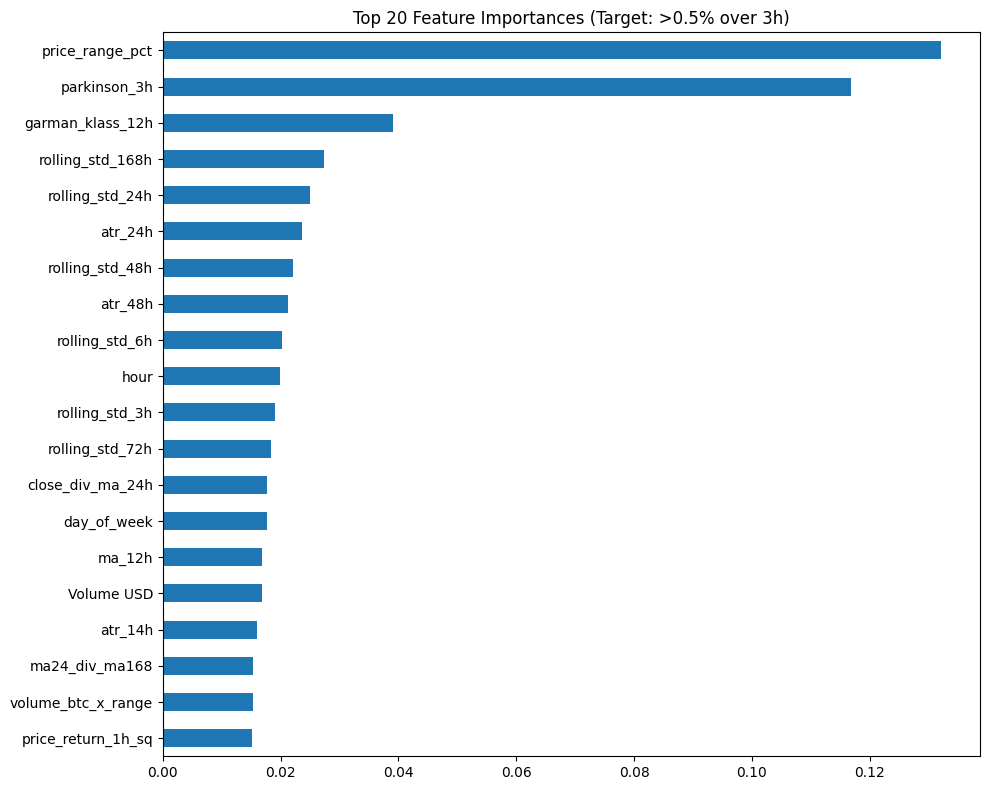


Selected top 25 features to keep based on importance:
['price_range_pct', 'parkinson_3h', 'garman_klass_12h', 'rolling_std_168h', 'rolling_std_24h', 'atr_24h', 'rolling_std_48h', 'atr_48h', 'rolling_std_6h', 'hour', 'rolling_std_3h', 'rolling_std_72h', 'close_div_ma_24h', 'day_of_week', 'ma_12h', 'Volume USD', 'atr_14h', 'ma24_div_ma168', 'volume_btc_x_range', 'price_return_1h_sq', 'low', 'std12_div_std72', 'ma_168h', 'Volume BTC', 'close_div_ma_168h']


In [141]:
# --- 1. Get Feature Importances from the LAST trained 'best_model' ---

# Ensure 'best_model' is the variable holding the result from grid_search.best_estimator_
# Ensure 'features' is the DataFrame containing the feature columns *used to train that model*

if 'best_model' in locals() and hasattr(best_model, 'feature_importances_'):
    print("\n--- Feature Importances from Best Model (Target: >0.5% over 3h) ---")

    importances = pd.Series(best_model.feature_importances_, index=features.columns)
    importances = importances.sort_values(ascending=False) # Sort with most important first

    print("Top 30 Feature Importances:")
    print(importances.head(30))

    print("\nLeast Important 10 Features:")
    print(importances.tail(10))

    # --- Optional: Plot Top N Importances ---
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    importances.head(20).plot(kind='barh') # Plot top 20
    plt.title('Top 20 Feature Importances (Target: >0.5% over 3h)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # --- Define Features to Keep (Example Strategy) ---
    # Strategy 1: Keep top N features
    N = 25 # Example: Keep the top 25 features
    features_to_keep = importances.head(N).index.tolist()

    # Strategy 2: Keep features above a certain importance threshold (requires inspection)
    # threshold_importance = 0.005 # Example threshold, adjust based on output
    # features_to_keep = importances[importances > threshold_importance].index.tolist()

    print(f"\nSelected top {len(features_to_keep)} features to keep based on importance:")
    print(features_to_keep)

else:
    print("Error: 'best_model' not found or doesn't have feature importances.")
    print("Please ensure the GridSearchCV code ran successfully and 'best_model' is defined.")
    # As a fallback, just keep all features if importance isn't available
    features_to_keep = features.columns.tolist()
    print("\nWarning: Using ALL features as importance data wasn't available.")

In [144]:
# --- Step 2: Create New DataFrame with Selected Features ---
# Include essential columns needed for target calculation + selected features
print("\n--- Creating Reduced DataFrame ---")
essential_cols = ['unix', 'date', 'close'] # Adjust if different time/price columns used
essential_cols = [col for col in essential_cols if col in df.columns] # Check existence

# Ensure no duplicates between essential_cols and features_to_keep
unique_features_to_keep = [f for f in features_to_keep if f not in essential_cols]
cols_for_selected_df = essential_cols + unique_features_to_keep

print(f"Columns for new DataFrame: {cols_for_selected_df}")

# Create the new DataFrame using .copy()
df_selected = df[cols_for_selected_df].copy()
print(f"Shape of df_selected initially: {df_selected.shape}")


--- Creating Reduced DataFrame ---
Columns for new DataFrame: ['close', 'price_range_pct', 'parkinson_3h', 'garman_klass_12h', 'rolling_std_168h', 'rolling_std_24h', 'atr_24h', 'rolling_std_48h', 'atr_48h', 'rolling_std_6h', 'hour', 'rolling_std_3h', 'rolling_std_72h', 'close_div_ma_24h', 'day_of_week', 'ma_12h', 'Volume USD', 'atr_14h', 'ma24_div_ma168', 'volume_btc_x_range', 'price_return_1h_sq', 'low', 'std12_div_std72', 'ma_168h', 'Volume BTC', 'close_div_ma_168h']
Shape of df_selected initially: (60023, 26)


In [145]:
# --- Step 3: Define NEW Target Variable on the Reduced DataFrame ---
horizon = 6
threshold_pct = 1.0
new_target_col_name = f'target_{horizon}h_gt_{threshold_pct}pct'
intermediate_col_name = f'price_change_{horizon}h_future'

print(f"\n--- Creating New Target (> {threshold_pct}% / {horizon}h) on Reduced DF ---")
df_selected[intermediate_col_name] = (df_selected['close'].shift(-horizon) / df_selected['close'] - 1) * 100
df_selected[new_target_col_name] = (df_selected[intermediate_col_name] > threshold_pct).astype(int)


--- Creating New Target (> 1.0% / 6h) on Reduced DF ---


In [146]:
# --- Step 4: Handle NaNs on the Reduced DataFrame ---
# Drop NaNs from target shift AND from the original feature engineering for selected features
print(f"NaN count before final drop (selected features):\n{df_selected.isnull().sum().sort_values(ascending=False).head(10)}")
initial_rows = df_selected.shape[0]
# The subset now includes the new target and only the features we kept
cols_to_check_for_nan = [new_target_col_name] + unique_features_to_keep
df_selected = df_selected.dropna(subset=cols_to_check_for_nan)
final_rows = df_selected.shape[0]
print(f"Handled NaNs. Dropped {initial_rows - final_rows} rows.")
print(f"Final DataFrame shape for modeling: {df_selected.shape}")

if df_selected.empty or len(df_selected) < 500:
     print("Error: Not enough data remaining after NaN handling. Exiting.")
     exit()

NaN count before final drop (selected features):
price_change_6h_future    6
close                     0
price_range_pct           0
close_div_ma_168h         0
Volume BTC                0
ma_168h                   0
std12_div_std72           0
low                       0
price_return_1h_sq        0
volume_btc_x_range        0
dtype: int64
Handled NaNs. Dropped 0 rows.
Final DataFrame shape for modeling: (60023, 28)


In [147]:
# --- Step 5: Define Final Features (X) and Target (y) ---
target_series = df_selected[new_target_col_name]
# Features are now just the selected ones (excluding base/intermediate/target cols)
features_final = df_selected[unique_features_to_keep] # Use the list derived from features_to_keep

print(f"\nUsing {features_final.shape[1]} SELECTED features for modeling.")
print(f"Target variable distribution ('{target_series.name}'):\n{target_series.value_counts(normalize=True)}")


Using 25 SELECTED features for modeling.
Target variable distribution ('target_6h_gt_1.0pct'):
target_6h_gt_1.0pct
0    0.823801
1    0.176199
Name: proportion, dtype: float64


In [148]:
# --- Step 6: Optimize Data Types (Memory Saving) ---
print("\nOptimizing feature data types for memory...")
for col in features_final.columns:
    if features_final[col].dtype == 'float64':
        features_final[col] = features_final[col].astype('float32')
    elif features_final[col].dtype == 'int64':
        min_val, max_val = features_final[col].min(), features_final[col].max()
        if min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
             features_final[col] = features_final[col].astype('int32')
        elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
             features_final[col] = features_final[col].astype('int16')
        elif min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
             features_final[col] = features_final[col].astype('int8')
print("Memory usage after optimization:")
features_final.info(memory_usage='deep')


Optimizing feature data types for memory...
Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
Index: 60023 entries, 171 to 60233
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_range_pct     60023 non-null  float32
 1   parkinson_3h        60023 non-null  float32
 2   garman_klass_12h    60023 non-null  float32
 3   rolling_std_168h    60023 non-null  float32
 4   rolling_std_24h     60023 non-null  float32
 5   atr_24h             60023 non-null  float32
 6   rolling_std_48h     60023 non-null  float32
 7   atr_48h             60023 non-null  float32
 8   rolling_std_6h      60023 non-null  float32
 9   hour                60023 non-null  int32  
 10  rolling_std_3h      60023 non-null  float32
 11  rolling_std_72h     60023 non-null  float32
 12  close_div_ma_24h    60023 non-null  float32
 13  day_of_week         60023 non-null  int32  
 14  ma_12h              60023 n

C:\Users\mason\AppData\Local\Temp\ipykernel_16048\219204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_final[col] = features_final[col].astype('float32')
C:\Users\mason\AppData\Local\Temp\ipykernel_16048\219204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_final[col] = features_final[col].astype('float32')
C:\Users\mason\AppData\Local\Temp\ipykernel_16048\219204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [149]:
# --- Step 7: Create Final Hold-out Set ---
final_test_size_ratio = 0.15
final_split_index = int(len(features_final) * (1 - final_test_size_ratio))

# Use the FINAL features and target for splitting
X_train_val = features_final[:final_split_index]
X_final_test = features_final[final_split_index:]
y_train_val = target_series[:final_split_index]
y_final_test = target_series[final_split_index:]

print(f"\nData split for GridSearch + Final Test:")
print(f"Training/Validation set shape: X={X_train_val.shape}, y={y_train_val.shape}")
print(f"Final Hold-out Test set shape: X={X_final_test.shape}, y={y_final_test.shape}")


Data split for GridSearch + Final Test:
Training/Validation set shape: X=(51019, 25), y=(51019,)
Final Hold-out Test set shape: X=(9004, 25), y=(9004,)


In [150]:
# --- Step 8: Define Parameter Grid ---
# (Same as before, adjust if needed)
param_grid = {
    'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.1, 0.05],
    'subsample': [0.8], 'colsample_bytree': [0.8], 'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01], 'reg_lambda': [1, 0.1]
}
print("\nParameter Grid for GridSearchCV:")
print(param_grid)
num_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"Total combinations: {num_combinations}")


Parameter Grid for GridSearchCV:
{'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.1, 0.05], 'subsample': [0.8], 'colsample_bytree': [0.8], 'gamma': [0, 0.1], 'reg_alpha': [0, 0.01], 'reg_lambda': [1, 0.1]}
Total combinations: 64


In [151]:
# --- Step 9: Setup TimeSeriesSplit ---
n_splits_cv = 8
max_test_size = len(X_train_val) // (n_splits_cv + 1)
cv_test_size = min(500, max_test_size)
if cv_test_size < 100: cv_test_size = max(50, cv_test_size)
tscv_grid = TimeSeriesSplit(n_splits=n_splits_cv, test_size=cv_test_size)
print(f"\nUsing TimeSeriesSplit for GridSearchCV with n_splits={n_splits_cv}, test_size={cv_test_size}")


Using TimeSeriesSplit for GridSearchCV with n_splits=8, test_size=500


In [152]:
# --- Step 10: Initialize Base Model ---
neg_count = (y_train_val == 0).sum(); pos_count = (y_train_val == 1).sum()
scale_pos_weight_val = neg_count / pos_count if pos_count > 0 else 1
print(f"Calculated scale_pos_weight: {scale_pos_weight_val:.2f}")

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,
    random_state=42, scale_pos_weight=scale_pos_weight_val
)

Calculated scale_pos_weight: 4.62


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [153]:
# --- Step 11: Setup & Run GridSearchCV ---
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
n_jobs_setting = 1 # Use 1 core to be safe on memory
print(f"Setting n_jobs={n_jobs_setting} for GridSearchCV.")
grid_search = GridSearchCV(
    estimator=xgb_model, param_grid=param_grid, scoring=roc_auc_scorer,
    cv=tscv_grid, n_jobs=n_jobs_setting, verbose=2
)

print(f"\nStarting GridSearchCV (Selected Features, New Target >{threshold_pct}%/{horizon}h)...")

grid_search.fit(X_train_val, y_train_val) # Fit on the selected features
print("GridSearchCV complete.")

Setting n_jobs=1 for GridSearchCV.

Starting GridSearchCV (Selected Features, New Target >1.0%/6h)...
Fitting 8 folds for each of 64 candidates, totalling 512 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.3s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.2s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.0s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.1s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.5s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.9s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.6s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=150, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.7s


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV complete.


In [154]:
# --- Step 12: Display & Evaluate Best Model ---
print(f"\n--- GridSearchCV Best Results (Selected Features, Target: >{threshold_pct}% over {horizon}h) ---")
print(f"Best ROC AUC Score (on validation folds): {grid_search.best_score_:.4f}")
print("Best Hyperparameters:"); print(grid_search.best_params_)
best_model_final = grid_search.best_estimator_

print("\n--- Evaluating Best Model on Final Hold-Out Test Set ---")
# X_final_test already contains only selected features
y_final_pred_proba = best_model_final.predict_proba(X_final_test)[:, 1]
y_final_pred_class = best_model_final.predict(X_final_test)

final_accuracy = accuracy_score(y_final_test, y_final_pred_class)
try:
    final_roc_auc = roc_auc_score(y_final_test, y_final_pred_proba)
    print(f"Final Test Set ROC AUC: {final_roc_auc:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC AUC on final test set: {e}"); final_roc_auc = np.nan
print(f"Final Test Set Accuracy: {final_accuracy:.4f}")
print("\nFinal Test Set Classification Report:"); print(classification_report(y_final_test, y_final_pred_class, digits=4, zero_division=0))


--- GridSearchCV Best Results (Selected Features, Target: >1.0% over 6h) ---
Best ROC AUC Score (on validation folds): 0.6458
Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.8}

--- Evaluating Best Model on Final Hold-Out Test Set ---
Final Test Set ROC AUC: 0.5866
Final Test Set Accuracy: 0.7175

Final Test Set Classification Report:
              precision    recall  f1-score   support

           0     0.8568    0.7941    0.8243      7513
           1     0.2420    0.3313    0.2797      1491

    accuracy                         0.7175      9004
   macro avg     0.5494    0.5627    0.5520      9004
weighted avg     0.7550    0.7175    0.7341      9004



In [155]:
# --- 12. Evaluate High-Confidence Predictions ---

confidence_threshold = 0.7 # Define your desired confidence level

print(f"\n--- Evaluating Predictions with Confidence > {confidence_threshold:.2f} ---")

# Create a boolean mask for predictions above the threshold
high_confidence_mask = (y_final_pred_proba > confidence_threshold)

# Get the actual outcomes for these high-confidence predictions
y_test_high_conf = y_final_test[high_confidence_mask]

# Get the predicted classes for these (they should all be 1 if threshold > 0.5)
# We actually don't need the predicted *class* here, just the actuals.
# But for clarity/completeness:
# y_pred_class_high_conf = y_final_pred_class[high_confidence_mask]

# Calculate the number of predictions made above the threshold
num_high_conf_preds = len(y_test_high_conf)

if num_high_conf_preds > 0:
    # Calculate how many of these high-confidence predictions were correct
    # Correct means the actual value (y_test_high_conf) was 1 (positive move)
    correct_high_conf_preds = y_test_high_conf.sum() # Since target is 0 or 1

    # Calculate the accuracy (Precision) for this subset
    accuracy_high_conf = correct_high_conf_preds / num_high_conf_preds

    # Calculate the percentage of the total test set these represent
    perc_of_test_set = (num_high_conf_preds / len(y_final_test)) * 100

    print(f"Number of predictions with confidence > {confidence_threshold:.2f}: {num_high_conf_preds}")
    print(f"  - Representing {perc_of_test_set:.2f}% of the final test set.")
    print(f"Number of CORRECT predictions among these: {correct_high_conf_preds}")
    print(f"Accuracy (Precision) for predictions with confidence > {confidence_threshold:.2f}: {accuracy_high_conf:.4f}")

    # You can also calculate recall specifically for this subset, although it's less direct
    # total_actual_positives_in_test = y_final_test.sum()
    # if total_actual_positives_in_test > 0:
    #     recall_for_high_conf = correct_high_conf_preds / total_actual_positives_in_test
    #     print(f"Recall achieved by these high-confidence predictions: {recall_for_high_conf:.4f} (out of all actual positives)")

else:
    print(f"No predictions found with confidence > {confidence_threshold:.2f}.")

# --- You can repeat the block above for different thresholds ---
# Example for threshold = 0.8
confidence_threshold_2 = 0.8
print(f"\n--- Evaluating Predictions with Confidence > {confidence_threshold_2:.2f} ---")
high_confidence_mask_2 = (y_final_pred_proba > confidence_threshold_2)
y_test_high_conf_2 = y_final_test[high_confidence_mask_2]
num_high_conf_preds_2 = len(y_test_high_conf_2)
if num_high_conf_preds_2 > 0:
    correct_high_conf_preds_2 = y_test_high_conf_2.sum()
    accuracy_high_conf_2 = correct_high_conf_preds_2 / num_high_conf_preds_2
    perc_of_test_set_2 = (num_high_conf_preds_2 / len(y_final_test)) * 100
    print(f"Number of predictions with confidence > {confidence_threshold_2:.2f}: {num_high_conf_preds_2}")
    print(f"  - Representing {perc_of_test_set_2:.2f}% of the final test set.")
    print(f"Number of CORRECT predictions among these: {correct_high_conf_preds_2}")
    print(f"Accuracy (Precision) for predictions with confidence > {confidence_threshold_2:.2f}: {accuracy_high_conf_2:.4f}")
else:
    print(f"No predictions found with confidence > {confidence_threshold_2:.2f}.")


--- Evaluating Predictions with Confidence > 0.70 ---
Number of predictions with confidence > 0.70: 171
  - Representing 1.90% of the final test set.
Number of CORRECT predictions among these: 38
Accuracy (Precision) for predictions with confidence > 0.70: 0.2222

--- Evaluating Predictions with Confidence > 0.80 ---
Number of predictions with confidence > 0.80: 12
  - Representing 0.13% of the final test set.
Number of CORRECT predictions among these: 4
Accuracy (Precision) for predictions with confidence > 0.80: 0.3333
